In [1]:
# import the library required
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
#load test and train data in pandas dataframe

In [5]:
train=pd.read_csv("Train-Set.csv")
test=pd.read_csv("Test-Set.csv")

In [6]:
train.shape

(8523, 12)

In [9]:
train.columns

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales'],
      dtype='object')

In [10]:
test.columns

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType'],
      dtype='object')

In [11]:
# combine test and train into one file

In [12]:
train["source"]="train"
test["source"]="test"
data=pd.concat([train,test],ignore_index=True)

In [13]:
print(data.shape)

(14204, 13)


In [14]:
data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [15]:
#Describe function show the numerical data summary
data.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
# checking the missing values
data.isnull().sum()

ProductID               0
Weight               2439
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           4016
LocationType            0
OutletType              0
OutletSales          5681
source                  0
dtype: int64

In [20]:
data["FatContent"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [21]:
data["EstablishmentYear"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [22]:
# calculate outlate size
data["OutletSize"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [24]:
data["FatContent"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: FatContent, dtype: int64

In [26]:
# print count value of outlet size
data["OutletSize"].value_counts()

Medium    4655
Small     3980
High      1553
Name: OutletSize, dtype: int64

In [27]:
data["OutletSize"].mode()[0]

'Medium'

In [28]:
data["OutletSize"]=data["OutletSize"].fillna(data["OutletSize"].mode()[0])

In [29]:
data["Weight"]=data["Weight"].fillna(data["Weight"].mean())

<AxesSubplot:>

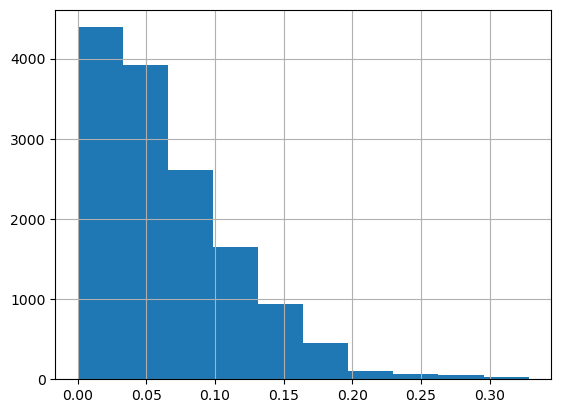

In [30]:
#plot to reveal a distribution of item ProductVisibility 
data["ProductVisibility"].hist()

<AxesSubplot:>

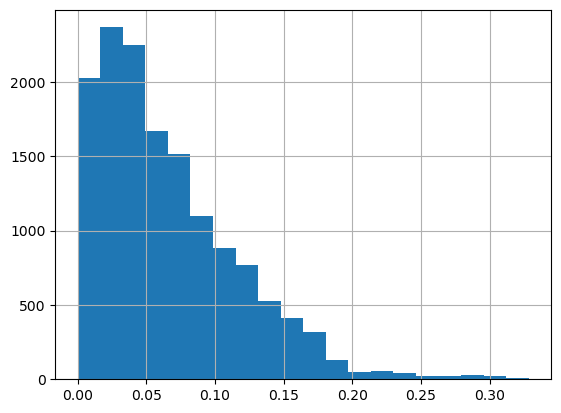

In [31]:
data["ProductVisibility"].hist(bins=20)

In [33]:
# Detecting outlairs
Q1=data["ProductVisibility"].quantile(0.25)

In [34]:
Q3=data["ProductVisibility"].quantile(0.75)

In [35]:
# calculate the Inter Quartile Range
IQR=Q3-Q1


In [39]:
fill_data=data.query("(@Q1 - 1.5 * @IQR) <= ProductVisibility <= (@Q3 + 1.5 * @IQR)")

In [41]:
fill_data.head(2)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train


In [43]:
fill_data.shape

(13943, 13)

In [44]:
data.shape

(14204, 13)

In [45]:
data=fill_data

In [46]:
data["FatContent"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)